In [1]:
import pickle
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from functions import get_movies_scores, get_infos, get_X, get_y, data_without_v, remove_empty_variables, question_from_v
from variable_selection_metrics import user_questions, random_questions, loop_simulation, metrics_simulations
from metrics import random_forest, forward_feature_selection, backward_feature_elimination, random_variable_choice, variable_mean_choice

In [2]:
%load_ext autoreload
%autoreload 2

# Load Data

In [3]:
pkl = open('cleaned_movie_data.pkl','rb')
data = pickle.load(pkl)
pkl.close()

In [4]:
data.drop(['occupation', 'gender', 'age'], axis=1, inplace=True)

# Weighted variable selection

- Les données sont normalisées
- Une liste des variables est créée, initialisé avec 0.5 pour chaque variable
- Une question est posée vis à vis d'une variable
- En fonction de la réponse, on change la valeur de la variable dans le tableau (0.8 si oui, 0.2 si non), puis on enlève la variable dans les données
- Une fonction va moyenner les scores des variables et les pondérer avec les scores pour renvoyer quelque chose entre 0 et 1
- On s'arrête quand le nombre de films notés en moyenne au dessus de 0.4 devient en dessous de 10

In [101]:
def weighted_user_questions(data, metric, display = False):
    # Creation of the variables list
    variables = list(data.columns)
    for v in ['rating','item','user']:
        variables.remove(v)
    weights = np.full(len(variables), 0.5)
    
    # Create normalized data
    normalized_data = normalize_data(data, variables)
    
    # Create modificable data
    new_data = normalized_data.copy()
    
    # Compute averages
    avgs = {v:np.mean(normalized_data[v]) for v in variables}
    
    k = 0

    while k < 10 and len(get_X(new_data).columns) > 1:
        X, y = get_X(new_data), get_y(new_data)
        v = metric(X, y, display=display)
        v_id = variables.index(v)
        
        # y_or_n = input(str(v)+"? (y/n)")
        y_or_n = input(question_from_v(v, threshold=avgs[v]))
        
        
        
        if y_or_n == "y" or y_or_n == "Y" or y_or_n == "yes" or y_or_n == "Yes" :
            weights[v_id] = 0.8
            new_data = data_without_v(new_data, v, avgs[v], lower=False)
        elif y_or_n == "n" or y_or_n == "N" or y_or_n == "no" or y_or_n == "No" :
            weights[v_id] = 0.2
            new_data = data_without_v(new_data, v, avgs[v], lower=True)
        
        
        #print(weights)
        #print(get_item_score(normalized_data.iloc[0], weights, variables, avgs))
        
        
        new_data.drop([v], axis=1, inplace=True)
        remove_empty_variables(new_data)
        
        k += 1
    
    scores = []
    for i in range(len(norm_data)):
        scores.append(get_item_score(normalized_data.iloc[i], weights, variables, avgs))
    winners = norm_data.iloc[[i for i in range(len(scores)) if scores[i] > 0.58]].item.unique()
        
    return winners

In [102]:
def get_item_score(item, weights, variables, avgs):
    score = 0
    for i, v in enumerate(variables):
        if item[v] > avgs[v]:
            score += weights[i]
        else :
            score += 1 - weights[i]
    return score / len(variables)

In [103]:
def normalize_data(data, variables):
    normalized_data = data.copy()
    for c in variables:
        max_ = np.max(normalized_data[c])
        min_ = np.min(normalized_data[c])
        if max_-min_ > 0:
            normalized_data[c] = (normalized_data[c] - min_) / (max_ - min_)
    return normalized_data

In [104]:
winners = weighted_user_questions(data, forward_feature_selection)

Do you prefer movies more recent than y
Do you like Drama movies? (y/n)n
Do you like Animation movies? (y/n)n
Do you like Romance movies? (y/n)n
Do you like Comedy movies? (y/n)y
Do you like Children's movies? (y/n)n
Do you like War movies? (y/n)n
Do you like Sci-Fi movies? (y/n)y
Do you like Adventure movies? (y/n)n
Do you like Action movies? (y/n)y


In [68]:
variables = list(data.columns)
for v in ['rating','item','user']:
    variables.remove(v)
norm_data = normalize_data(data, variables)
avgs = {v:np.mean(norm_data[v]) for v in variables}

In [69]:
scores = []
for i in range(len(norm_data)):
    scores.append(get_item_score(norm_data.iloc[i], weights, variables, avgs))

(array([3.2000e+01, 2.8400e+02, 6.5700e+03, 0.0000e+00, 2.2012e+04,
        2.3482e+04, 0.0000e+00, 3.4052e+04, 1.2898e+04, 6.6100e+02]),
 array([0.37368421, 0.39578947, 0.41789474, 0.44      , 0.46210526,
        0.48421053, 0.50631579, 0.52842105, 0.55052632, 0.57263158,
        0.59473684]),
 <a list of 10 Patch objects>)

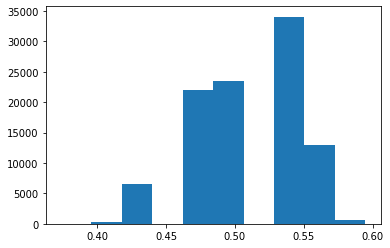

In [70]:
plt.hist(scores)

In [96]:
winners

array([ 242,  302,  346, ..., 1637, 1630, 1641])